# Purpose

The purpose of this notebook is to look into the basic unique listening event analysis

## Load Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import swifter
import itertools
import os
from scipy import stats

In [2]:
def pairwise(iterable):
    "s -> (s0,s1), (s1,s2), (s2, s3), ..."
    a, b = itertools.tee(iterable)
    next(b, None)
    return zip(a, b)

## Prepping Data

In [3]:
temp = pd.read_parquet('../data/KidListeningEventsWithAudioFeatures.gzip.parquet', columns = ['Age', 'Education Level', 'User Id', 'Track Id'])
data = temp[['Age', 'Education Level', 'User Id']].drop_duplicates(ignore_index = True)
data

,Age,Education Level,User Id
0,16,HS,15397460
1,17,HS,21211675
2,17,HS,31413349
3,17,HS,48700136
4,17,HS,33069335
...,...,...,...
3411,16,HS,48838026
3412,17,HS,47156540
3413,17,HS,48422022
3414,16,HS,47574621


In [4]:
t = temp.groupby(['User Id', 'Track Id']).agg(TrackListenedCount = ('Track Id', 'count')).reset_index()
t = t.groupby(['User Id']).agg(UniqueCount = ('TrackListenedCount', 'count'), TotalCount = ('TrackListenedCount', 'sum'))
data = data.merge(t, how = 'left', on = 'User Id')
data

,Age,Education Level,User Id,UniqueCount,TotalCount
0,16,HS,15397460,2311,3896
1,17,HS,21211675,2220,19596
2,17,HS,31413349,2998,8505
3,17,HS,48700136,1930,11428
4,17,HS,33069335,1075,5400
...,...,...,...,...,...
3411,16,HS,48838026,120,133
3412,17,HS,47156540,37,43
3413,17,HS,48422022,43,55
3414,16,HS,47574621,5647,31013


In [5]:
data['Percentage of Unique Tracks'] = data['UniqueCount'] / data['TotalCount']
data

,Age,Education Level,User Id,UniqueCount,TotalCount,Percentage of Unique Tracks
0,16,HS,15397460,2311,3896,0.593172
1,17,HS,21211675,2220,19596,0.113288
2,17,HS,31413349,2998,8505,0.352499
3,17,HS,48700136,1930,11428,0.168883
4,17,HS,33069335,1075,5400,0.199074
...,...,...,...,...,...,...
3411,16,HS,48838026,120,133,0.902256
3412,17,HS,47156540,37,43,0.860465
3413,17,HS,48422022,43,55,0.781818
3414,16,HS,47574621,5647,31013,0.182085


## Graphs

### by Education Level

***GS -> MS: Ttest_indResult(statistic=7.494722717077286, pvalue=5.910817343389757e-13)
***MS -> HS: Ttest_indResult(statistic=-3.665348370011252, pvalue=0.00025082460206291604)


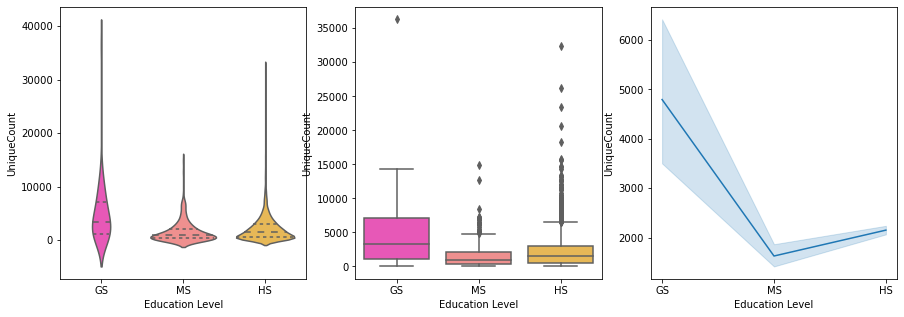

***GS -> MS: Ttest_indResult(statistic=4.7843662758634355, pvalue=2.5698000197792264e-06)
***MS -> HS: Ttest_indResult(statistic=-2.9782355419425075, pvalue=0.0029198774288979623)


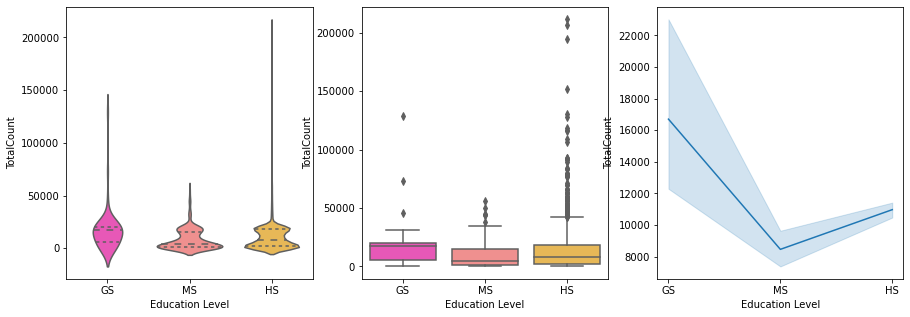

GS -> MS: Ttest_indResult(statistic=2.0515654787742355, pvalue=0.04098441102968008)
MS -> HS: Ttest_indResult(statistic=-1.1551443218033055, pvalue=0.24811354472367567)


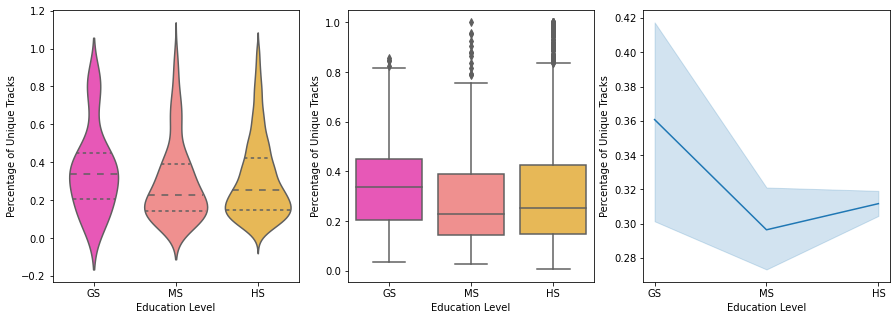

In [6]:
for column in data.columns:
    if (column == 'Education Level' or column == 'User Id' or column == 'Age'):
        continue

    for (x, y) in pairwise(data['Education Level'].cat.categories):
        t = stats.ttest_ind(data[data['Education Level'] == x][column], data[data['Education Level'] == y][column])
        if (t.pvalue <= .005):
            print('***' + str(x) + ' -> ' + str(y) + ': ' + str(t))
        else:
            print(str(x) + ' -> ' + str(y) + ': ' + str(t))

    fig, axs = plt.subplots(ncols = 3, figsize=(15, 5))
    sns.violinplot(x = 'Education Level', y = column, inner = 'quartile', data = data, ax = axs[0], palette='spring')
    sns.boxplot(x = 'Education Level', y = column, data = data, ax = axs[1], palette='spring')
    sns.lineplot(x = 'Education Level', y = column, data = data, ax = axs[2], palette='spring')
    plt.show();

### by Age

6 -> 7: Ttest_indResult(statistic=0.5659329807901685, pvalue=0.5766931186829236)
7 -> 8: Ttest_indResult(statistic=-0.2527154467978847, pvalue=0.8037061321359388)
8 -> 9: Ttest_indResult(statistic=1.3338491672540391, pvalue=0.20921252832152906)
9 -> 10: Ttest_indResult(statistic=-1.2774892715641024, pvalue=0.22773316431971488)
10 -> 11: Ttest_indResult(statistic=-0.18073459096866698, pvalue=0.858845386539115)
11 -> 12: Ttest_indResult(statistic=1.481320216902199, pvalue=0.14861511296072)
12 -> 13: Ttest_indResult(statistic=0.7588597582498745, pvalue=0.44989757177100964)
13 -> 14: Ttest_indResult(statistic=0.7077576170224036, pvalue=0.4797396391721239)
14 -> 15: Ttest_indResult(statistic=-0.9100118949293031, pvalue=0.36313867743901207)
15 -> 16: Ttest_indResult(statistic=-2.777472932026343, pvalue=0.005549540655190654)
***16 -> 17: Ttest_indResult(statistic=-4.386196696774345, pvalue=1.1997382896129403e-05)


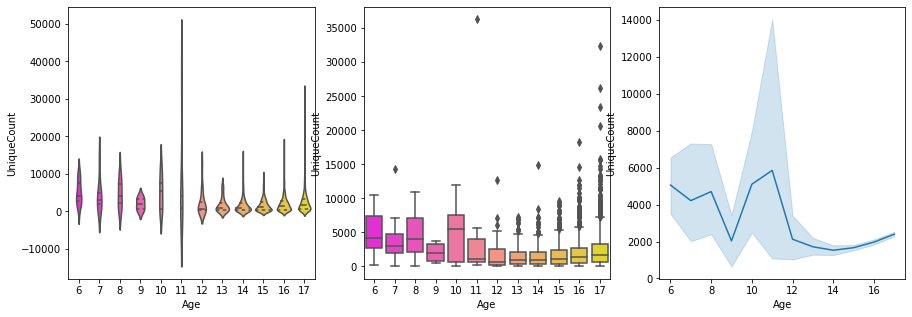

6 -> 7: Ttest_indResult(statistic=2.1654839027718884, pvalue=0.04051121088609273)
7 -> 8: Ttest_indResult(statistic=-1.1739484757903063, pvalue=0.2575943654988205)
8 -> 9: Ttest_indResult(statistic=1.3999404751731894, pvalue=0.18909789413926462)
9 -> 10: Ttest_indResult(statistic=-2.019980745594767, pvalue=0.06841851081411798)
10 -> 11: Ttest_indResult(statistic=-0.2478060752614832, pvalue=0.8074365910196872)
11 -> 12: Ttest_indResult(statistic=1.73706030613741, pvalue=0.09230481264152642)
12 -> 13: Ttest_indResult(statistic=-0.5709271039246585, pvalue=0.5694563066299332)
13 -> 14: Ttest_indResult(statistic=-0.41047927627045344, pvalue=0.681797743183479)
14 -> 15: Ttest_indResult(statistic=0.03633438691107962, pvalue=0.9710263946319236)
15 -> 16: Ttest_indResult(statistic=-2.389127468715194, pvalue=0.01701677770004383)
***16 -> 17: Ttest_indResult(statistic=-3.0208776441378498, pvalue=0.002545149136042947)


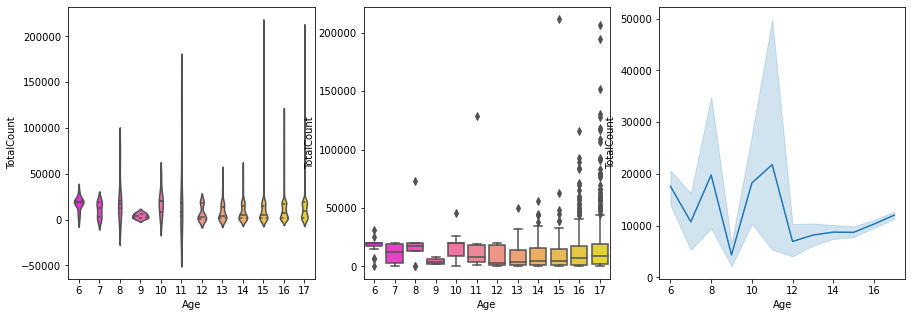

6 -> 7: Ttest_indResult(statistic=-1.915776418702909, pvalue=0.06738082609776744)
7 -> 8: Ttest_indResult(statistic=0.557127843432092, pvalue=0.5851501768769543)
8 -> 9: Ttest_indResult(statistic=-0.12274469062914274, pvalue=0.9045231614223797)
9 -> 10: Ttest_indResult(statistic=1.4017158440296102, pvalue=0.18858072616229354)
10 -> 11: Ttest_indResult(statistic=-0.14856674317857904, pvalue=0.8837518421787498)
11 -> 12: Ttest_indResult(statistic=-0.8583090895554091, pvalue=0.3973097911816522)
12 -> 13: Ttest_indResult(statistic=1.2435879885945031, pvalue=0.21684540678029815)
13 -> 14: Ttest_indResult(statistic=0.7198187335283673, pvalue=0.47229325794196586)
14 -> 15: Ttest_indResult(statistic=-1.6589090910960698, pvalue=0.09759523635318518)
15 -> 16: Ttest_indResult(statistic=0.329599045373638, pvalue=0.7417509800267894)
16 -> 17: Ttest_indResult(statistic=-0.0408482296658478, pvalue=0.967420047894376)


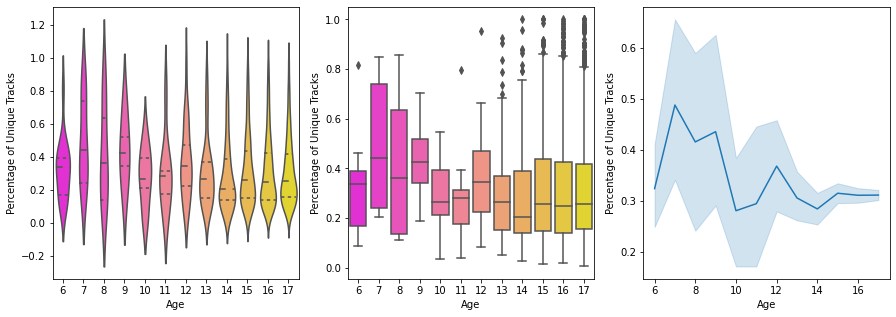

In [7]:
for column in data.columns:
    if (column == 'Education Level' or column == 'User Id' or column == 'Age'):
        continue

    for (x, y) in pairwise(sorted(data['Age'].unique())):
        t = stats.ttest_ind(data[data['Age'] == x][column], data[data['Age'] == y][column])
        if (t.pvalue <= .005):
            print('***' + str(x) + ' -> ' + str(y) + ': ' + str(t))
        else:
            print(str(x) + ' -> ' + str(y) + ': ' + str(t))

    fig, axs = plt.subplots(ncols = 3, figsize=(15, 5))
    sns.violinplot(x = 'Age', y = column, inner = 'quartile', data = data, ax = axs[0], palette='spring')
    sns.boxplot(x = 'Age', y = column, data = data, ax = axs[1], palette='spring')
    sns.lineplot(x = 'Age', y = column, data = data, ax = axs[2], palette='spring')
    plt.show();